Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [3]:
df = pd.read_csv('/content/multiple_linear_regression.csv')

In [4]:
df

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Data Preprocessing

In [7]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [8]:
df.shape

(200, 4)

Splitting Data

In [9]:
output_col = 'Target'

In [11]:
# input
x = df.iloc[:, df.columns != output_col]

In [12]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [18]:
# output
y = df.iloc[:, df.columns == output_col]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [31]:
print('x train : ', x_train.shape)
print('y train : ', y_train.shape)
print('x test   : ', x_test.shape)
print('y test : ', y_test.shape)

x train :  (140, 3)
y train :  (140, 1)
x test   :  (60, 3)
y test :  (60, 1)


<font color="green">**Multiple** **Linear** **Regression**</font>


Training

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
# coefficients
lr.coef_


array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [34]:
# intercept
lr.intercept_

array([3.0777745])

Prediction

In [35]:
predict = lr.predict(x_test)

Cost

In [37]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, predict)
cost

2.2412862530933473

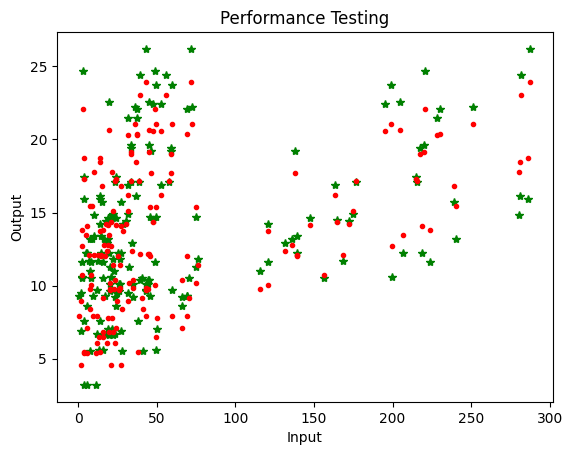

In [40]:
plt.plot(x_test, y_test, '*', color = 'green')
plt.plot(x_test, predict, '.', color = 'red')
plt.title('Performance Testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

<font color="green">Assumptions of Linear </font>


1. Homoscedasticity

In [41]:
# No relation between residuals and predicted values

In [43]:
print(predict)

[[ 8.41710143]
 [15.36146115]
 [12.08619274]
 [ 9.75953058]
 [11.37799221]
 [18.73526253]
 [23.94158412]
 [ 7.11931733]
 [22.06606191]
 [16.83172907]
 [ 7.93115903]
 [23.07243791]
 [19.15729792]
 [ 5.47677475]
 [15.42102256]
 [ 9.82205717]
 [12.08023645]
 [ 9.76094922]
 [21.07717663]
 [ 9.13945016]
 [20.36205828]
 [12.03862691]
 [13.78082146]
 [10.73225482]
 [16.20061541]
 [ 7.77042699]
 [20.6251206 ]
 [20.31966315]
 [ 8.97266008]
 [14.13746173]
 [17.28381353]
 [15.13827164]
 [17.18376843]
 [19.03374633]
 [17.13952183]
 [12.14670527]
 [12.7815946 ]
 [ 6.08135492]
 [10.06634988]
 [13.48921606]
 [12.01549843]
 [ 9.70107337]
 [ 5.35398678]
 [10.14966171]
 [14.224196  ]
 [14.04780871]
 [14.33053495]
 [10.39465714]
 [21.04417964]
 [13.74703482]
 [ 6.4651166 ]
 [ 7.90550808]
 [17.69866554]
 [17.74668208]
 [12.39498913]
 [12.69345805]
 [20.58946722]
 [18.4269009 ]
 [ 4.59145621]
 [ 6.82129794]]


In [44]:
residuals = y_test - predict

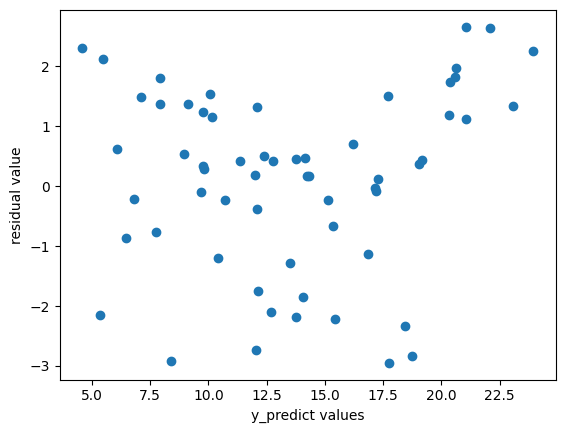

In [46]:
plt.scatter(predict, residuals)
plt.xlabel('y_predict values')
plt.ylabel('residual value')
plt.show()

2. Normality of residuals

<ipython-input-48-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

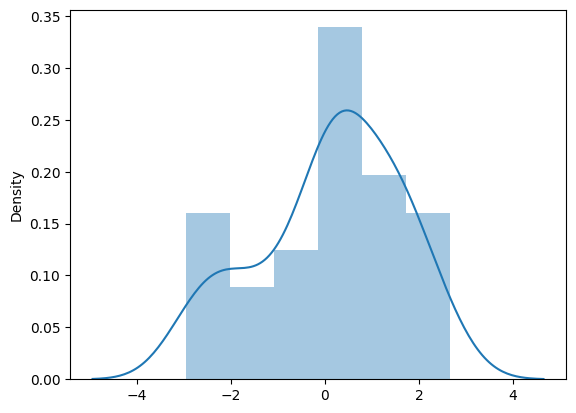

In [48]:
sns.distplot(residuals)

<font color="green">Ordinary Least Square (OLS) Method</font>


In [52]:
import statsmodels.api as sm

In [51]:
df

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [53]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [54]:
model = sm.OLS(y_train, x_with_constant)

In [55]:
result = model.fit()

In [56]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [57]:
# compare with coefficients
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [58]:
# compare with intercept
lr.intercept_

array([3.0777745])

In [60]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           1.67e-63
Time:                        11:38:24   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0